### Sarcasm Prediction using Deep Learning

This project is meant for differentiating whether the given passage is sarcasm or not. The Data's are captured in the json format and its been loaded afterwards for processing. 

#### Why Deep Learning?

The data to be processed is huge, which results in large memory space and time for processing.Deep Learning out perform other techniques if the data size is large.As per Andrew Ng, the chief scientist of China’s major search engine Baidu and one of the leaders of the Google Brain Project, “The analogy to deep learning is that the rocket engine is the deep learning models and the fuel is the huge amounts of data we can feed to these algorithms.”

##### Note:

This project is constructed using keras, a high-level neural networks API which is written using Python and capable of running over TensorFlow.


In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import json

##### About the dataset

The dataset is saved as json file, which is loaded using context manager. Both the independent and dependent feature, headline and is_sarcastic respectively, is saved in the list.

In [2]:
with open("sarcasm.json") as file:
    data = json.load(file)

In [3]:
headline = []
sarcastic = []
for content in data:
    headline.append(content["headline"])
    sarcastic.append(content["is_sarcastic"])

In [4]:
len(headline)

26709

#### Splitting the dataset

Dataset is splitted in to training dataset and testing dataset. Model will be fitted using training dataset and validated using new datasets which is not seed by the model during training, so called testing dataset. In this way, we can able to calculate the perfomance of the model.

Slicing function, provided by python, is used for this purpose!!

In [5]:
training_size = 15000

In [6]:
training_data = headline[:training_size]
testing_data = headline[training_size:]
training_label = sarcastic[:training_size]
testing_label = sarcastic[training_size:]

why do we need vocabulary and embedding dimension and other paramteres, it at all I get the proper information

In [7]:
vocabulary = 10000
embedding_dim = 16
max_length =  100
trunc ='post'
padding ='post'
oov_token = "<OOV>"

stating about what tokenizer does, fits_on_texts, pad_sequences, texts_to_sequences

In [8]:
tokenizer =Tokenizer(num_words=vocabulary, oov_token = oov_token)

In [9]:
tokenizer.fit_on_texts(training_data)

In [10]:
training_data = tokenizer.texts_to_sequences(training_data) 

In [11]:
padded_training_data = pad_sequences(training_data, padding=padding, truncating=trunc, maxlen=max_length)

In [12]:
testing_data = tokenizer.texts_to_sequences(testing_data) 

In [13]:
padded_testing_data = pad_sequences(testing_data, padding=padding, truncating=trunc, maxlen=max_length)

np array why?

In [14]:
training_data = np.array(padded_training_data)
testing_data = np.array(padded_testing_data)
training_label = np.array(training_label)
testing_label = np.array(testing_label)

about keras sequential, Embedding and global average pooling 1d relu sigmoid

In [15]:
model = keras.Sequential()

In [16]:
model.add(keras.layers.Embedding(vocabulary, embedding_dim, input_length=max_length))

In [17]:
model.add(keras.layers.GlobalAveragePooling1D())

In [18]:
model.add(keras.layers.Dense(24, activation='relu'))

In [19]:
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_data, training_label, epochs=25, validation_data=(testing_data, testing_label), verbose=2)

Train on 15000 samples, validate on 11709 samples
Epoch 1/25
15000/15000 - 3s - loss: 0.6801 - accuracy: 0.5563 - val_loss: 0.6487 - val_accuracy: 0.5971
Epoch 2/25
15000/15000 - 2s - loss: 0.5288 - accuracy: 0.7646 - val_loss: 0.4361 - val_accuracy: 0.8280
Epoch 3/25
15000/15000 - 3s - loss: 0.3564 - accuracy: 0.8675 - val_loss: 0.3777 - val_accuracy: 0.8352
Epoch 4/25
15000/15000 - 3s - loss: 0.2856 - accuracy: 0.8913 - val_loss: 0.3526 - val_accuracy: 0.8492
Epoch 5/25
15000/15000 - 2s - loss: 0.2411 - accuracy: 0.9088 - val_loss: 0.3470 - val_accuracy: 0.8503
Epoch 6/25
15000/15000 - 3s - loss: 0.2089 - accuracy: 0.9224 - val_loss: 0.3463 - val_accuracy: 0.8530
Epoch 7/25
15000/15000 - 2s - loss: 0.1815 - accuracy: 0.9349 - val_loss: 0.3530 - val_accuracy: 0.8510
Epoch 8/25
15000/15000 - 2s - loss: 0.1593 - accuracy: 0.9435 - val_loss: 0.3616 - val_accuracy: 0.8508
Epoch 9/25
15000/15000 - 3s - loss: 0.1399 - accuracy: 0.9517 - val_loss: 0.3765 - val_accuracy: 0.8505
Epoch 10/25
15

In [23]:
import matplotlib.pyplot as plt

In [24]:
def display_plot(string, history):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

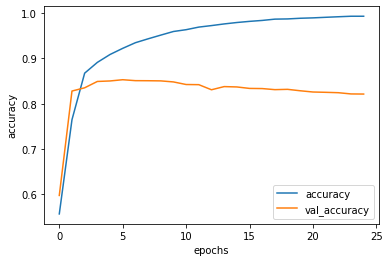

In [25]:
display_plot('accuracy', history)

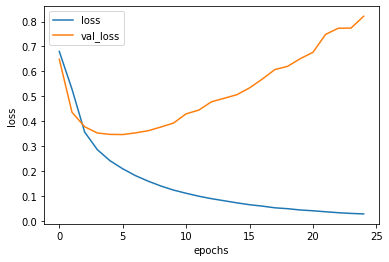

In [26]:
display_plot('loss', history)

In [27]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding, truncating=trunc)
print(model.predict(padded))

[[9.3029052e-01]
 [1.6304148e-07]]
